In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("US_Accidents_March23.csv")

In [3]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [4]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
df.dtypes.value_counts()

object     20
bool       13
float64    12
int64       1
dtype: int64

In [6]:
df.shape

(7728394, 46)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [9]:
df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [10]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values != 0 ]  
missing_values = missing_values.sort_values(ascending = False) 
missing_values


End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
dtype: int64

<AxesSubplot:>

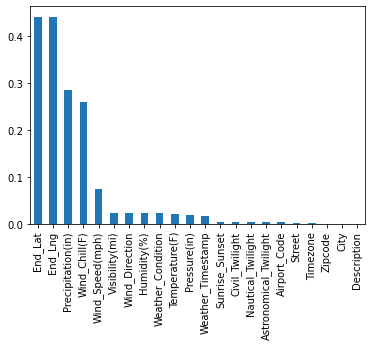

In [11]:
missing_values = missing_values/len(df)
missing_values.plot(kind='bar')

In [12]:
accident_per_city = df.City.value_counts()
accident_per_city[:20]

Miami            186917
Houston          169609
Los Angeles      156491
Charlotte        138652
Dallas           130939
Orlando          109733
Austin            97359
Raleigh           86079
Nashville         72930
Baton Rouge       71588
Atlanta           68186
Sacramento        66264
San Diego         55504
Phoenix           53974
Minneapolis       51488
Richmond          48845
Oklahoma City     46092
Jacksonville      42447
Tucson            39304
Columbia          38178
Name: City, dtype: int64

In [13]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [14]:
cities = df.City.unique()
cities

array(['Dayton', 'Reynoldsburg', 'Williamsburg', ..., 'Ness City',
       'Clarksdale', 'American Fork-Pleasant Grove'], dtype=object)

<AxesSubplot:>

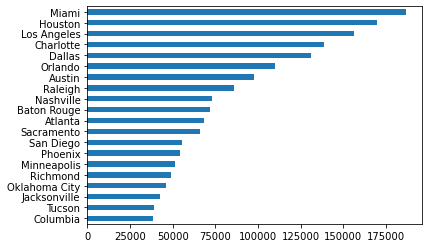

In [15]:
accident_per_city[:20].sort_values(ascending=True).plot(kind='barh')

In [16]:
import warnings 
warnings.filterwarnings('ignore') 
sns.set_style('darkgrid') 

<AxesSubplot:xlabel='City', ylabel='Density'>

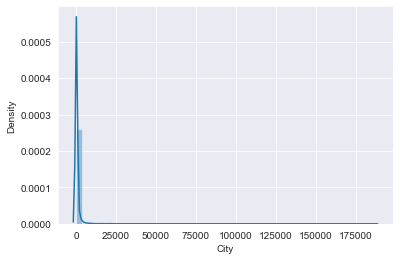

In [17]:
accident_per_city = df.City.value_counts() 
sns.distplot(accident_per_city)  # check the distribution of the accident per city  

In [18]:
high_accident_cities = accident_per_city[accident_per_city >= 1000]
low_accident_cities  = accident_per_city[accident_per_city < 1000 ]  

In [19]:
len(high_accident_cities)/ len(cities) * 100,   len(low_accident_cities) / len(cities) * 100 


(8.904159660793917, 91.0885298632941)

### there are only 8% cities are which having higer accident and rest of 91 % are having very few accidents *


<AxesSubplot:xlabel='City', ylabel='Density'>

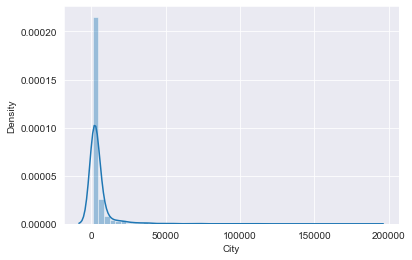

In [21]:
sns.distplot(high_accident_cities)

In [22]:
df.Start_Time = pd.to_datetime(df['Start_Time'] , errors='coerce' ) 


<AxesSubplot:xlabel='Start_Time'>

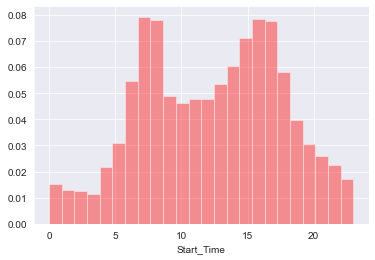

In [24]:
sns.distplot( df.Start_Time.dt.hour , bins = 24 , kde = False, norm_hist = True ,color = 'red') # norma_hist convert into per.

### we see that most of the Accidents occured in between the 6am to 9am and other is 3pm to 6pm 


<AxesSubplot:xlabel='Start_Time'>

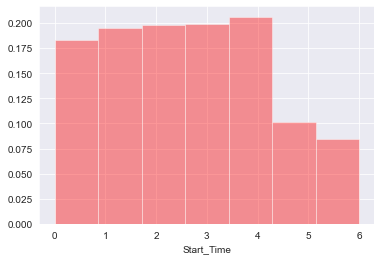

In [26]:
# df.Start_Time.dt.day  this give the day (actually the date from 30 days) 
sns.distplot( df.Start_Time.dt.dayofweek , bins = 7 , kde = False , norm_hist = True , color = 'red')   # this give the day position in week...  0 : sunday , 1 : monday , 2 : tuesday , 3 :wednesday 

### we can see that thare is very less number of accidents happends in a weekends... *


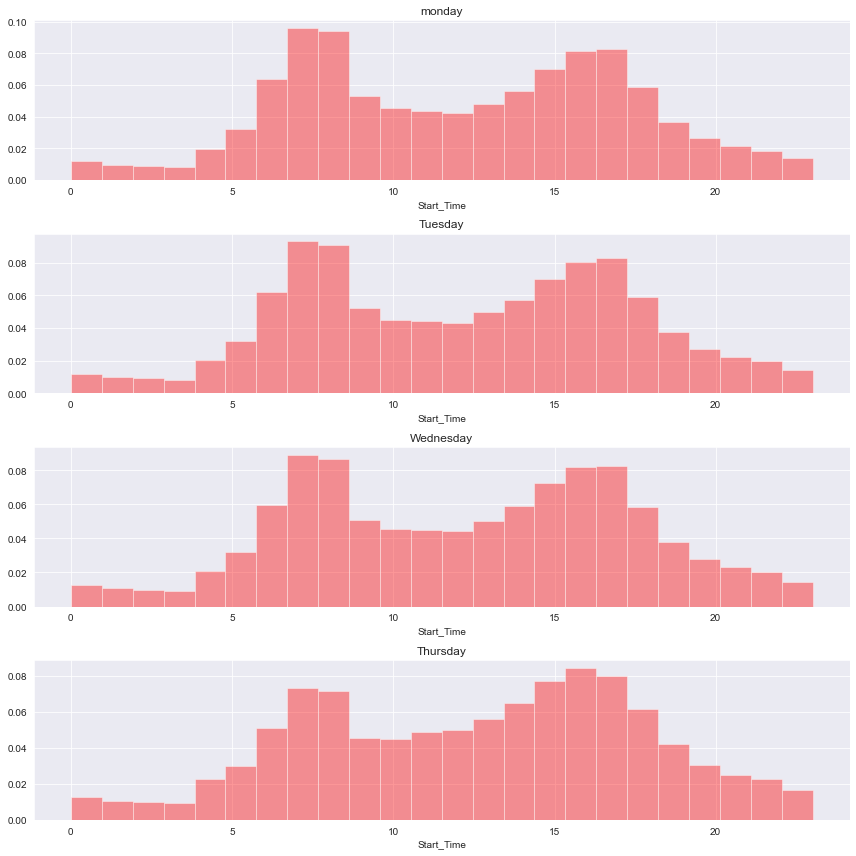

In [28]:
# checkout the distribution of accident on normal working day... 
import matplotlib.pyplot as plt 

mon_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 1 ] 
tues_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 2 ] 
wednes_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 3 ] 
thurs_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 4 ] 

fig , axis = plt.subplots(4,1 , figsize = ( 12 , 12)) 
sns.distplot(mon_day.dt.hour , bins = 24 , kde = False ,norm_hist = True ,ax = axis[0] , color = 'red').set_title('monday') 
sns.distplot(tues_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[1] , color = 'red').set_title('Tuesday')
sns.distplot(wednes_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[2] , color = 'red').set_title('Wednesday') 
sns.distplot(thurs_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[3] , color = 'red').set_title('Thursday')
fig.tight_layout()

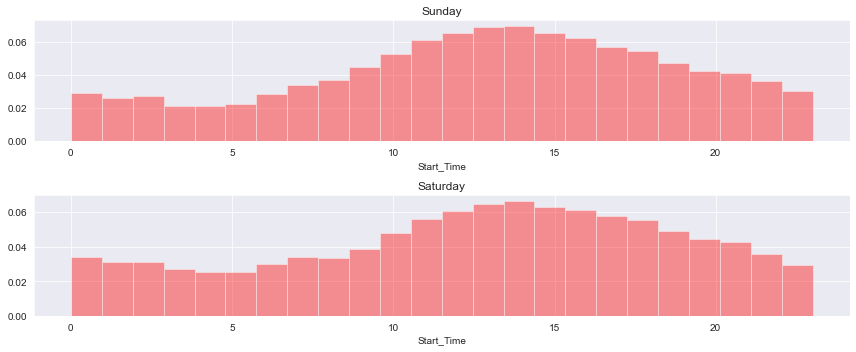

In [29]:
# now let's checkout the distribution of accident time on the weekends 
import matplotlib.pyplot as plt 

sun_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 5 ] 
sat_day = df.Start_Time [ df.Start_Time.dt.dayofweek == 6 ]

fig , axis = plt.subplots(2,1 , figsize = (12 ,5))
sns.distplot(sun_day.dt.hour , bins = 24 , kde = False ,norm_hist = True ,ax = axis[0] , color = 'red').set_title('Sunday') 
sns.distplot(sat_day.dt.hour , bins = 24 , kde= False ,norm_hist = True ,ax = axis[1] , color = 'red').set_title('Saturday') 
fig.tight_layout()

In [30]:
# we can see that thare is the diffrance between the distributioin of the accident time in weekends and normal days
#in weekends generally all accidents are happends after 10 am to 3pm while normal day it occured in between the 6am to 9am and then 3 pm to 5 pm 

<AxesSubplot:xlabel='Start_Time'>

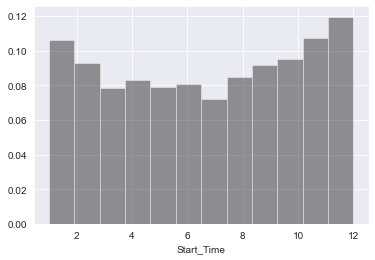

In [31]:
sns.distplot( df.Start_Time.dt.month , kde = False , bins = 12 , norm_hist = True , color = 'black')

### most of the accidents are happens in the sep to dec. ( probabily in winter ) 

### let's check this tred is the real or thare is some issue with the data samplling may be data is 5th 2016 to the 12th month of 2019 so we might get the last month most time and which make this trend so findout that this tred is real or it's due to some miss-samplling 

### let's see year wise so u can identify it..


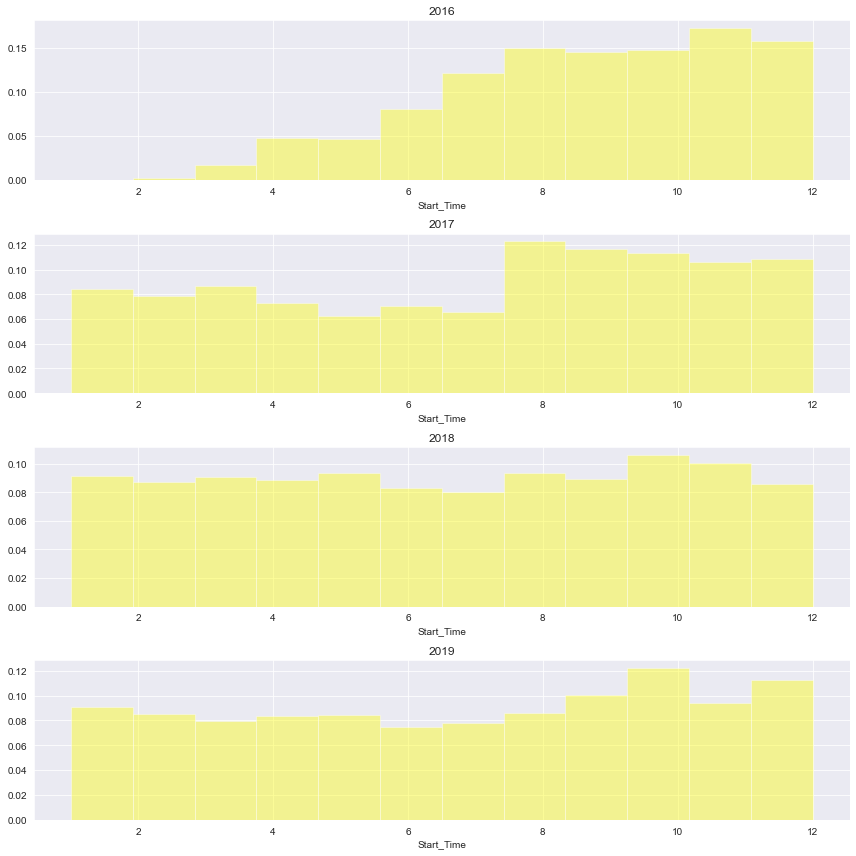

In [33]:
data_2016 = df.Start_Time [ df.Start_Time.dt.year == 2016 ] 
data_2017 = df.Start_Time [ df.Start_Time.dt.year == 2017 ] 
data_2018 = df.Start_Time [ df.Start_Time.dt.year == 2018 ] 
data_2019 = df.Start_Time [ df.Start_Time.dt.year == 2019 ] 

fig , axes = plt.subplots( 4, 1, figsize = (12,12) )
sns.distplot(data_2016.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[0] , color = 'yellow').set_title('2016')
sns.distplot(data_2017.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[1] , color = 'yellow' ).set_title('2017')
sns.distplot(data_2018.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[2] , color = 'yellow' ).set_title('2018')
sns.distplot(data_2019.dt.month, kde = False , bins = 12 , norm_hist = True , ax = axes[3] , color = 'yellow' ).set_title('2019')
fig.tight_layout()


 ### so We ca able to see that thare is only low distribution of the 2016 Year , so may be thare is some issue while collecting the data of 2016 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


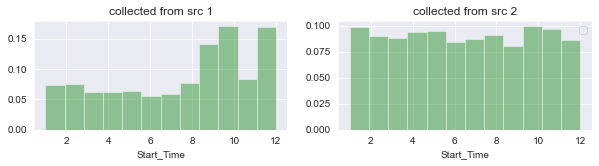

In [35]:
df_2019_data_src1 = data_2019[df.Source == 'Source1' ] # data which collected with source 1 
df_2019_data_src2 = data_2019[df.Source == 'Source2' ] # daata which colleted with source 2 

plt.figure(figsize=(10 , 2))
plt.subplot(1,2,1) 
sns.distplot( df_2019_data_src1.dt.month , bins = 12 , kde = False , norm_hist = True  , color = 'green')
plt.title('collected from src 1') 
plt.subplot(1,2,2) 
sns.distplot( df_2019_data_src2.dt.month , bins = 12 , kde = False , norm_hist = True , color ='green') 
plt.title('collected from src 2') 
plt.legend() 
plt.show()

### so we can see that thare is some fluke in the data which is colleted by the source 1 also we can see that source 2 data is uniform manner..

<AxesSubplot:ylabel='Source'>

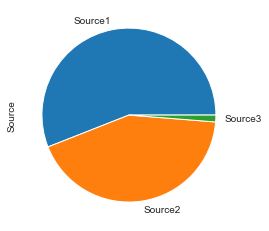

In [37]:
# now we check that how much data is coming from that perticuler source 

df.Source.value_counts().plot(kind = 'pie')  

In [38]:
df.Start_Lng ,df.Start_Lat


(0          -84.058723
 1          -82.831184
 2          -84.032608
 3          -84.205582
 4          -84.188354
               ...    
 7728389   -117.379360
 7728390   -117.148060
 7728391   -117.847790
 7728392   -118.403020
 7728393   -117.230920
 Name: Start_Lng, Length: 7728394, dtype: float64,
 0          39.865147
 1          39.928059
 2          39.063148
 3          39.747753
 4          39.627781
              ...    
 7728389    34.002480
 7728390    32.766960
 7728391    33.775450
 7728392    33.992460
 7728393    34.133930
 Name: Start_Lat, Length: 7728394, dtype: float64)

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

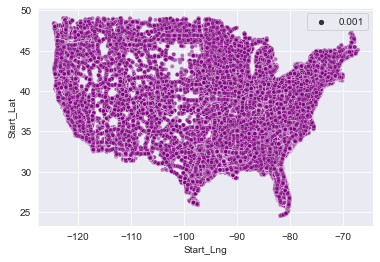

In [39]:
sns.scatterplot( x = df.Start_Lng , y = df.Start_Lat, size = 0.001  ,alpha = 0.5 ,color= 'purple') 

In [40]:
!pip install folium

In [41]:
import folium 
from folium.plugins import HeatMap 
lat_lng_pairs = zip( list(df.Start_Lat[:50]) , list(df.Start_Lng[:50]) ) 
map_ = folium.Map()  
HeatMap(lat_lng_pairs).add_to(map_) 
map_

### we can see that which areas are the highest accident prone areas.. from map by Longitudes and Latitudes..


<AxesSubplot:xlabel='Temperature(F)'>

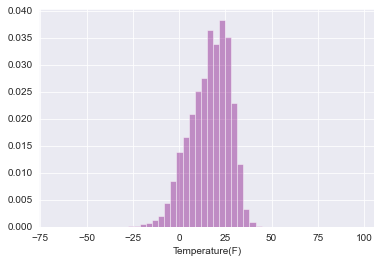

In [43]:
# temprature.
sns.distplot( (df['Temperature(F)'] - 32 ) * (5/9)   , kde = False , norm_hist = True , color = 'purple') 
# converted into the ºc 

### Most of the accidents are happends in the colder season or in winter..


In [45]:
colder = df[df['Temperature(F)'] <= 15]['Temperature(F)'] 
warmer = df[df['Temperature(F)'] >15]['Temperature(F)'] 

<AxesSubplot:xlabel='Temperature(F)', ylabel='Density'>

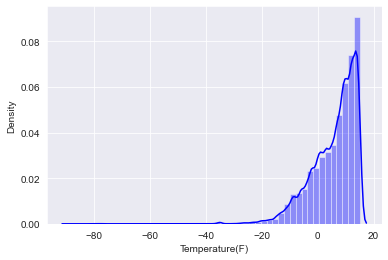

In [46]:
sns.distplot(colder , norm_hist = True  , color = 'blue') 


### Most of the Accidents are occured in between the 0º to 20ºC


<AxesSubplot:>

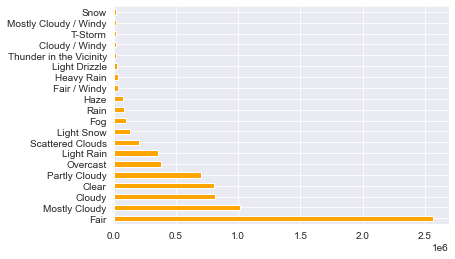

In [48]:
df.Weather_Condition.value_counts().sort_values(ascending = False)[:20].plot(kind = 'barh' , color = 'orange') 

### so in Winter and Rainy seasons thare is more chances of occuring accidents chances


In [50]:
total_weather_conditions = df.Weather_Condition.unique()
len(total_weather_conditions) , total_weather_conditions

(145,
 array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Rain', 'Light Snow',
        'Haze', 'Scattered Clouds', 'Partly Cloudy', 'Clear', 'Snow',
        'Light Freezing Drizzle', 'Light Drizzle', 'Fog', 'Shallow Fog',
        'Heavy Rain', 'Light Freezing Rain', 'Cloudy', 'Drizzle', nan,
        'Light Rain Showers', 'Mist', 'Smoke', 'Patches of Fog',
        'Light Freezing Fog', 'Light Haze', 'Light Thunderstorms and Rain',
        'Thunderstorms and Rain', 'Fair', 'Volcanic Ash', 'Blowing Sand',
        'Blowing Dust / Windy', 'Widespread Dust', 'Fair / Windy',
        'Rain Showers', 'Mostly Cloudy / Windy', 'Light Rain / Windy',
        'Hail', 'Heavy Drizzle', 'Showers in the Vicinity', 'Thunderstorm',
        'Light Rain Shower', 'Light Rain with Thunder',
        'Partly Cloudy / Windy', 'Thunder in the Vicinity', 'T-Storm',
        'Heavy Thunderstorms and Rain', 'Thunder', 'Heavy T-Storm',
        'Funnel Cloud', 'Heavy T-Storm / Windy', 'Blowing Snow',
        'Light Thu

<AxesSubplot:xlabel='Weather_Condition', ylabel='Density'>

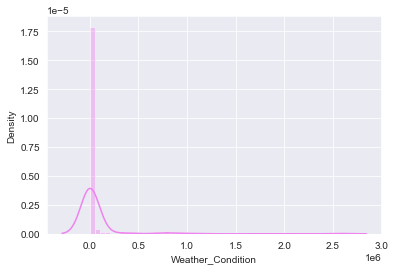

In [51]:
accidents_per_weather = df.Weather_Condition.value_counts() 
sns.distplot(accidents_per_weather , color = 'Violet') 

In [52]:
High_accident_weather = accidents_per_weather [accidents_per_weather >= 1000 ] 
low_accident_weather = accidents_per_weather [accidents_per_weather < 1000]   

len(High_accident_weather) / len(total_weather_conditions) * 100 , len(low_accident_weather) / len(total_weather_conditions) * 100

(32.41379310344827, 66.89655172413794)

### 32% of the weathers are having higher accidents and rest of are having lower accidents..


<AxesSubplot:ylabel='Weather_Condition'>

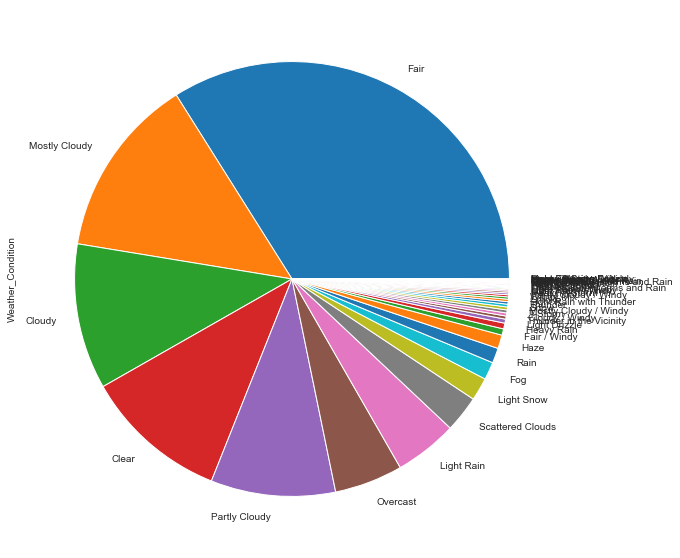

In [54]:
fig = plt.figure(figsize=(10, 10))
High_accident_weather.plot(kind='pie')
